In [1]:
import cv2
from PIL import Image
import cv2
import keras
import matplotlib.pyplot as plt

In [2]:
test_image = "D:/Python Preparatory/Artificial Intelligence/Assignments/dog_breed/test db/0c98f1cc700594739b13255084b2e64b.jpg"

In [3]:
image = cv2.imread(test_image)

In [4]:
type(image)

numpy.ndarray

In [5]:
image.shape

(350, 350, 3)

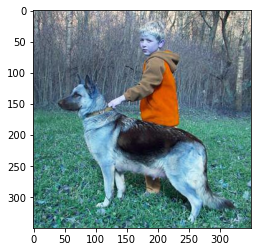

In [6]:
plt.imshow(image)

In [7]:
image[:,:,0]

array([[240, 205, 219, ..., 224, 234, 243],
       [205, 173, 188, ..., 218, 214, 217],
       [194, 155, 172, ..., 213, 199, 241],
       ...,
       [167,  75,  33, ...,  32,  29,  56],
       [129,  27,  59, ...,  63,  30,  46],
       [135,  46, 128, ...,  60,  28,  58]], dtype=uint8)

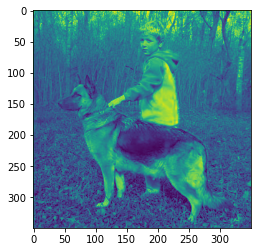

In [8]:
plt.imshow(image[:,:,0])

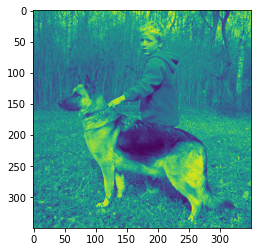

In [9]:
plt.imshow(image[:,:,1])

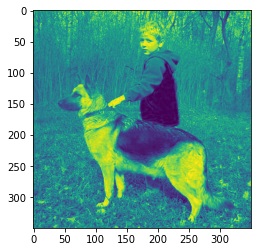

In [10]:
plt.imshow(image[:,:,2])

In [11]:
image1 = image.mean(axis=2)

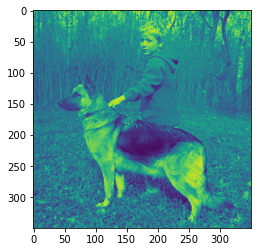

In [12]:
plt.imshow(image1)

In [13]:
from keras.preprocessing.image import load_img, img_to_array

In [14]:
image_3 = load_img("D:/Python Preparatory/Artificial Intelligence/Assignments/dog_breed/test db/0f58dffab12b3e92964731f3801ee4b1.jpg")

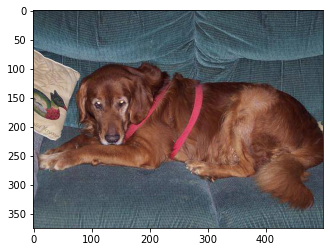

In [15]:
plt.imshow(image_3)

In [16]:
from keras.layers import Dense,Dropout,Input,MaxPooling2D,ZeroPadding2D,Conv2D,Flatten
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam,SGD
from keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_colwidth=150

In [17]:
df1=pd.read_csv("D:\Python Preparatory\Artificial Intelligence\Assignments\dog_breed\labels.csv")
df1.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [18]:
img_file= "D:/Python Preparatory/Artificial Intelligence/Assignments/dog_breed/train db/"

In [19]:
df=df1.assign(img_path=lambda x: img_file + x['id'] +'.jpg')
df.shape

(10222, 3)

In [20]:
from keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator

X=np.array([img_to_array(load_img(img, target_size=(96, 96))) for img in df['img_path'].values.tolist()])
X.shape

(10222, 96, 96, 3)

In [21]:
Y = pd.get_dummies(df['breed'])
Y.shape

(10222, 120)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(8177, 96, 96, 3) (8177, 120)
(2045, 96, 96, 3) (2045, 120)


In [23]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,Flatten,MaxPool2D,Dropout

In [24]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=(96,96,3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(8,(3,3)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(Y.shape[1]))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 64)        1792      
                                                                 
 activation (Activation)     (None, 94, 94, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 45, 45, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                    

In [25]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,
         validation_data=(X_test,Y_test),
         batch_size=32,
         epochs=75,
         verbose=2)

Epoch 1/75
256/256 - 69s - loss: 4.9312 - accuracy: 0.0119 - val_loss: 4.7948 - val_accuracy: 0.0093 - 69s/epoch - 269ms/step
Epoch 2/75
256/256 - 7262s - loss: 4.7786 - accuracy: 0.0115 - val_loss: 4.7829 - val_accuracy: 0.0073 - 7262s/epoch - 28s/step
Epoch 3/75
256/256 - 3796s - loss: 4.7663 - accuracy: 0.0131 - val_loss: 4.7681 - val_accuracy: 0.0156 - 3796s/epoch - 15s/step
Epoch 4/75
256/256 - 65s - loss: 4.7330 - accuracy: 0.0191 - val_loss: 4.7298 - val_accuracy: 0.0152 - 65s/epoch - 252ms/step
Epoch 5/75
256/256 - 69s - loss: 4.6860 - accuracy: 0.0197 - val_loss: 4.6796 - val_accuracy: 0.0191 - 69s/epoch - 270ms/step
Epoch 6/75
256/256 - 136s - loss: 4.6444 - accuracy: 0.0253 - val_loss: 4.6589 - val_accuracy: 0.0186 - 136s/epoch - 531ms/step
Epoch 7/75
256/256 - 62s - loss: 4.6067 - accuracy: 0.0265 - val_loss: 4.6465 - val_accuracy: 0.0196 - 62s/epoch - 240ms/step
Epoch 8/75
256/256 - 59s - loss: 4.5772 - accuracy: 0.0302 - val_loss: 4.6226 - val_accuracy: 0.0244 - 59s/epoch